# Learning to create a Dataset, Dataloader and train a model

## 1. Downloading the data

In [2]:
!wget -O pneumonia.zip 'https://storage.googleapis.com/kaggle-data-sets/519943/964544/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583169313&Signature=fhMELRil2nFCbJi%2FZeYFkJCea%2Fw8TDhhuEsS10rAPx1M0TxaXwdS2R2IZxYFKTM8m9DdUArN76LMdSnKY6W6X4LP7elMEyOvV1HrElSWPFORl63ndVaFlyAxsuhm23T9tls%2Fg3enJ%2FY8ljgl3gyK9cYrW2a7kiaU%2BXYjnIwHTOvxorzuyKZr2G9R9qW2CR9W0zHy56Ke0s5jldr7RCKq96dgKJPOceNBggBr%2BYiwpA5lLJRAnTzO8wdOy4WCwMm0BqGN%2BG2nxSRpLoa%2BoP6%2FiiutJZOUlrohxPQ%2FcPncM%2B8dfPDM9iJ%2FskrtQZeGu2L2Q4VcAL1DDNOMZiXKPX5E%2FQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-images-for-classification-pneumonia.zip'

--2020-02-28 18:15:47--  https://storage.googleapis.com/kaggle-data-sets/519943/964544/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583169313&Signature=fhMELRil2nFCbJi%2FZeYFkJCea%2Fw8TDhhuEsS10rAPx1M0TxaXwdS2R2IZxYFKTM8m9DdUArN76LMdSnKY6W6X4LP7elMEyOvV1HrElSWPFORl63ndVaFlyAxsuhm23T9tls%2Fg3enJ%2FY8ljgl3gyK9cYrW2a7kiaU%2BXYjnIwHTOvxorzuyKZr2G9R9qW2CR9W0zHy56Ke0s5jldr7RCKq96dgKJPOceNBggBr%2BYiwpA5lLJRAnTzO8wdOy4WCwMm0BqGN%2BG2nxSRpLoa%2BoP6%2FiiutJZOUlrohxPQ%2FcPncM%2B8dfPDM9iJ%2FskrtQZeGu2L2Q4VcAL1DDNOMZiXKPX5E%2FQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-images-for-classification-pneumonia.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2451790510 (2.3G) [application/zip]
Saving to: ‘pneumonia.zip’

pneumoni

In [0]:
!unzip pneumonia.zip

In [4]:
!ls pneumonia

test  train  validation


## 2. Creating the databunch

In [0]:
from fastai.vision import *
from fastai import *

In [0]:
data = ImageDataBunch.from_folder('pneumonia',valid='validation',size=224,bs=16)

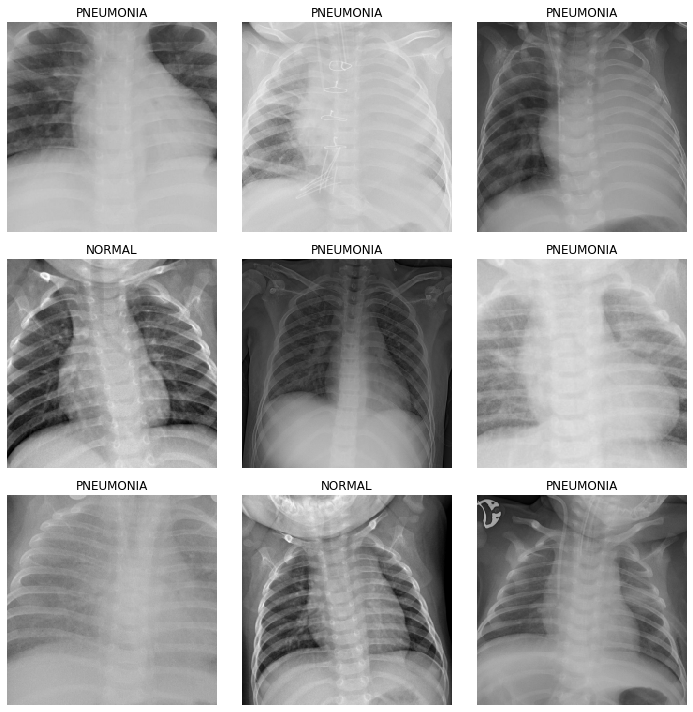

In [0]:
data.show_batch(rows=3,figsize=(10,10))

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns = ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


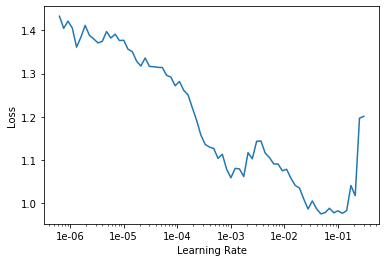

In [8]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.362518,0.504342,0.862628,02:45
1,0.255629,0.173566,0.943686,02:44
2,0.171133,0.093217,0.965870,02:45


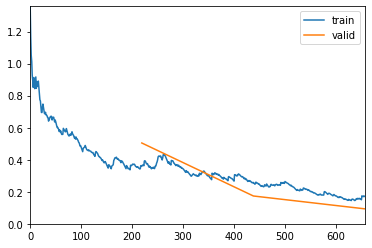

In [9]:
learn.fit_one_cycle(3,1e-2)